<a href="https://colab.research.google.com/github/garfield-gray/DCIM/blob/main/DCIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the name of God

 Implementation of DCIM 

 Author: Abbas Mohamadiyan (Garfield Gray=)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from numpy.linalg import svd
from numpy.linalg import pinv
from scipy.linalg import hankel
from numpy.linalg import eig
from numpy.linalg import eigvals

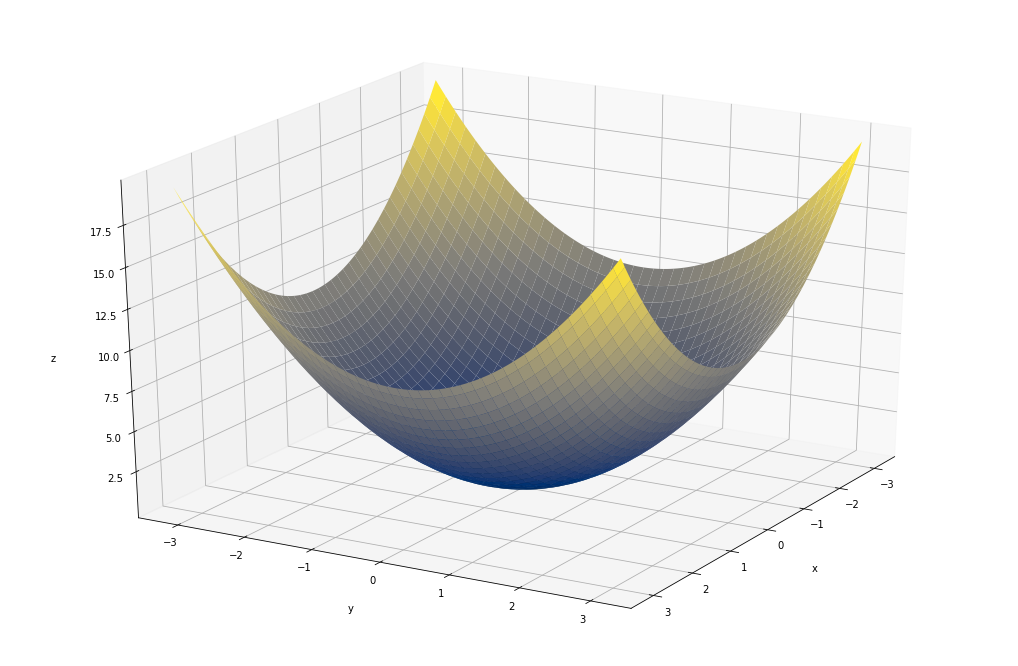

In [2]:
# building up MN samples of s(m,n)


x = np.arange(-np.pi, np.pi, 0.05)
y = np.arange(-np.pi, np.pi, 0.05)
M = len(x)
N = len(y)
K = int(np.floor(M/2))  #assuming that pencil parameter's better to be half of samples(like what we had in GPOF)
L = int(np.floor(N/2))

X, Y = np.meshgrid(x, y)

s = (X**2+Y**2)

"""plot"""
#                          (length, width)
fig = plt.figure(figsize = (18,12))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, Y, s, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

#fig.colorbar(surf, shrink=0.5, aspect=8)


#           (hight, long)
ax.view_init(25, 30)
plt.show()



In [3]:
# building up Fms and Fe matrices
Fms = []
for i in range(M):
  #                (first column, last row)
  Fms.append(hankel(s[i][0:L],s[i][L-1:N]))


In [4]:
# this might crash if matrix is big!
Fe_rows = []
for i in range(K):
  Fe_rows.append(np.hstack(Fms[i:M-K+i+1]))
  

In [5]:
Fe = np.vstack(Fe_rows) # it's true inshallah=)

In [6]:
# it may take some time! depending of matrix size
U1,Svalues1,Vh1 = svd(Fe, full_matrices=False)
# mabe it could be improved through improving the save of Hankel matrix

In [7]:
G1 = pinv(U1[:-L,:])@U1[L:,:]

In [8]:
Xps = eigvals(G1)

In [9]:
n=U1.shape[0]
I = np.identity(n)
p = np.arange(0,K*L,L)
for i in range(1,L):
  p = np.concatenate([p, np.arange(i,i+K*L,L)])
P = np.take(I,p,axis=0)  #Pis true inshaallah

In [14]:
Uprime2 = P@U1

In [15]:
Gprime2 = pinv(Uprime2[:-L,:])@Uprime2[L:,:]    #assuming Lrows deleted(if not, try out K

In [16]:
Yps = eigvals(Gprime2)

In [36]:
VYps = np.vander(Yps, N=N, increasing=True).T
#make the big matrix

In [38]:
VYps.shape

(126, 3969)

In [35]:
M

126

In [43]:
5*np.vander([2,3,4,5], N=3, increasing=True).T

array([[  5,   5,   5,   5],
       [ 10,  15,  20,  25],
       [ 20,  45,  80, 125]])